In [ ]:
#Import libraries
import pandas
import os
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
import random
from keras import models
from keras import layers
import matplotlib.pyplot as plt
from random import randrange
from random import seed
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from keras.wrappers.scikit_learn import KerasRegressor
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanAbsoluteError

# Open & Check Dataset

In [ ]:
path = os.getcwd()
print(path)

\\studfiles.campus.uvt.nl\files\home\home05\u252005\Desktop\Dita thesis


In [ ]:
compiled_dataset = pandas.read_csv(path + '\data\compiled_data.csv')

In [ ]:
print(compiled_dataset)
print(len(compiled_dataset))
print(len(compiled_dataset.columns))

           Word  Length  SubtlexZipf  Ortho_N  Phono_N   OLD   PLD  NPhon  \
0          help       4     5.963729        7        7  1.55  1.50      4   
1          best       4     5.606207       16       25  1.00  1.00      4   
2          full       4     5.221917       14       17  1.25  1.20      3   
3         music       5     5.180294        0        3  2.00  2.05      6   
4         smile       5     4.762979        1        4  1.75  1.75      4   
...         ...     ...          ...      ...      ...   ...   ...    ...   
18231      romp       4     2.738992        4        4  1.80  1.80      4   
18232   cowhand       7     2.634257        0        0  2.65  3.15      6   
18233    minnow       6     2.467925        0        5  2.80  1.75      4   
18234     cinch       5     3.554285        3        8  1.75  1.80      4   
18235  palmetto       8     1.990804        0        0  3.35  3.80      7   

       NSyll  NMorph  ...  zrt_std_l1  nobs_l2  accuracy_l2  rt_mean_l2  \


In [ ]:
print(compiled_dataset['rt_mean_l1'].values)

[ 815  798  841 ... 1088 1109 1170]


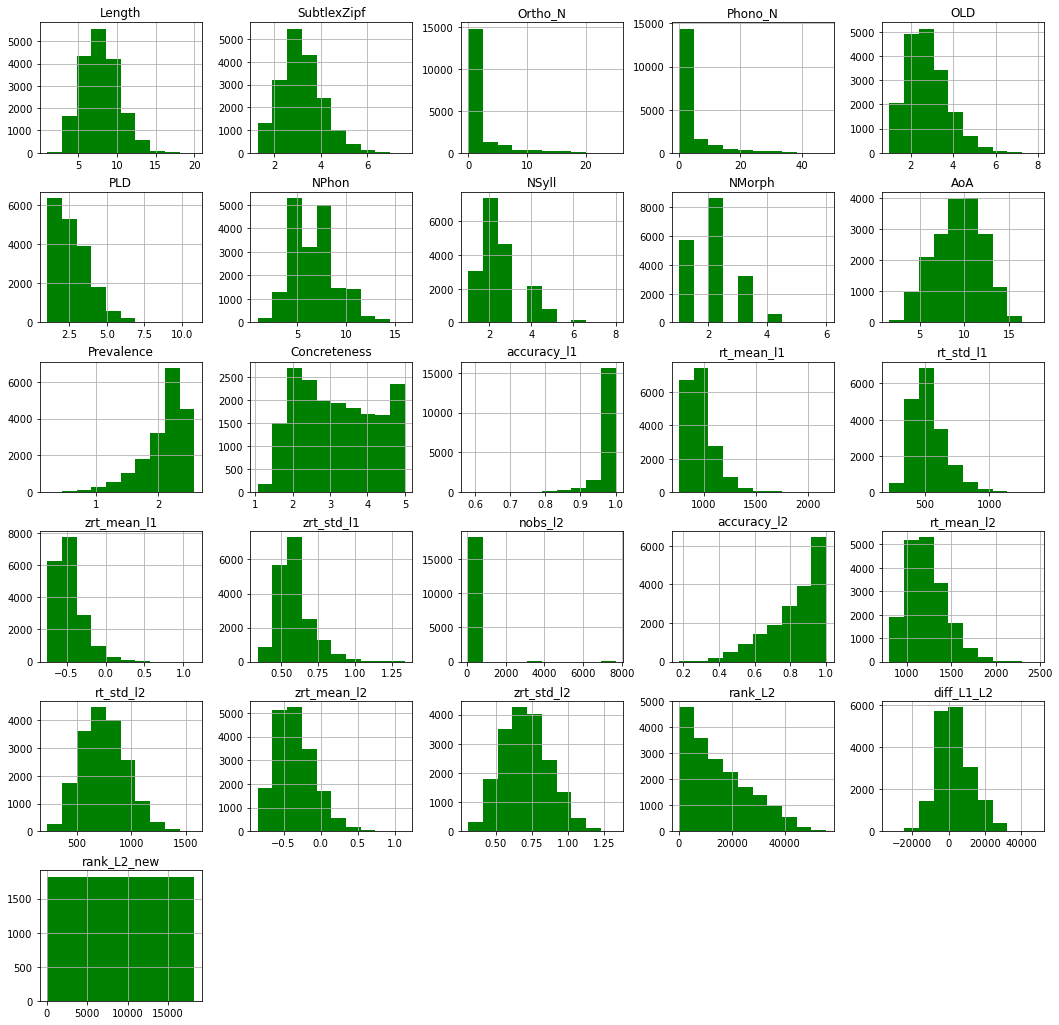

In [ ]:
compiled_dataset.hist(label = ['rt_mean_l1', 'rt_std_l1'], facecolor='g', figsize=(18,18))
plt.show()

In [ ]:
for col in compiled_dataset:
    print(col,":", type(compiled_dataset[col][0]))

Word : <class 'str'>
Length : <class 'numpy.int64'>
SubtlexZipf : <class 'numpy.float64'>
Ortho_N : <class 'numpy.int64'>
Phono_N : <class 'numpy.int64'>
OLD : <class 'numpy.float64'>
PLD : <class 'numpy.float64'>
NPhon : <class 'numpy.int64'>
NSyll : <class 'numpy.int64'>
NMorph : <class 'numpy.int64'>
AoA : <class 'numpy.float64'>
Prevalence : <class 'numpy.float64'>
Concreteness : <class 'numpy.float64'>
accuracy_l1 : <class 'numpy.float64'>
rt_mean_l1 : <class 'numpy.int64'>
rt_std_l1 : <class 'numpy.int64'>
zrt_mean_l1 : <class 'numpy.float64'>
zrt_std_l1 : <class 'numpy.float64'>
nobs_l2 : <class 'numpy.int64'>
accuracy_l2 : <class 'numpy.float64'>
rt_mean_l2 : <class 'numpy.int64'>
rt_std_l2 : <class 'numpy.float64'>
zrt_mean_l2 : <class 'numpy.float64'>
zrt_std_l2 : <class 'numpy.float64'>
rank_L2 : <class 'numpy.int64'>
diff_L1_L2 : <class 'numpy.int64'>
rank_L2_new : <class 'numpy.int64'>


In [ ]:
labels = compiled_dataset['rank_L2_new'].values

In [ ]:
print(labels)
print(type(labels))
print(len(labels))

[    1     2     3 ... 18234 18235 18236]
<class 'numpy.ndarray'>
18236


In [ ]:
clean_dataset = compiled_dataset.drop(columns= ['Word', 'Prevalence', 'Ortho_N', 'Phono_N','rt_mean_l1', 'rt_std_l1', 'nobs_l2', 'accuracy_l2', 'rt_mean_l2', 'rt_std_l2', 'zrt_mean_l2', 'zrt_std_l2', 'rank_L2', 'diff_L1_L2', 'rank_L2_new'])

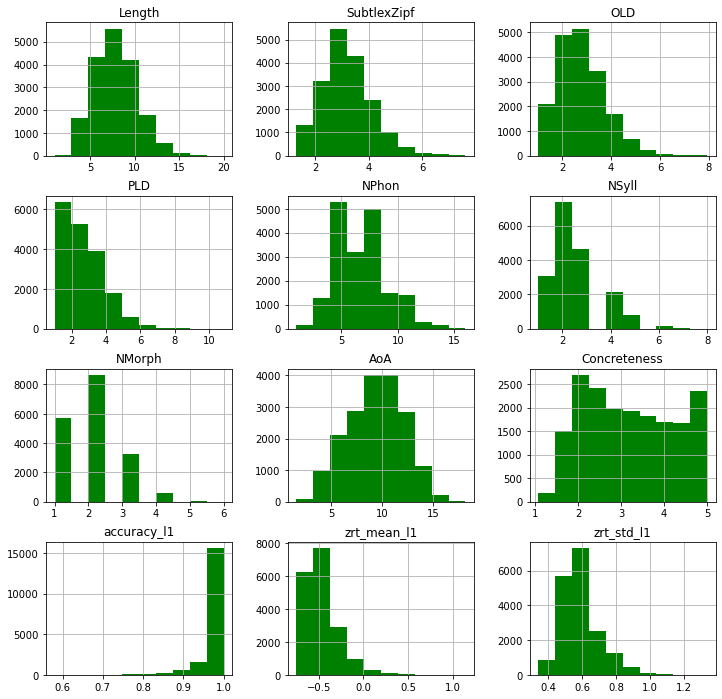

In [ ]:
clean_dataset.hist(facecolor='g', figsize=(12,12))
plt.show()

In [ ]:
for col in clean_dataset:
    print(col,":", type(clean_dataset[col][0]))

Length : <class 'numpy.int64'>
SubtlexZipf : <class 'numpy.float64'>
Ortho_N : <class 'numpy.int64'>
Phono_N : <class 'numpy.int64'>
OLD : <class 'numpy.float64'>
PLD : <class 'numpy.float64'>
NPhon : <class 'numpy.int64'>
NSyll : <class 'numpy.int64'>
NMorph : <class 'numpy.int64'>
AoA : <class 'numpy.float64'>
Concreteness : <class 'numpy.float64'>
accuracy_l1 : <class 'numpy.float64'>
zrt_mean_l1 : <class 'numpy.float64'>
zrt_std_l1 : <class 'numpy.float64'>


In [ ]:
# Word Frequency
word_freq = compiled_dataset['SubtlexZipf'].values

# Word Characteristics
ortho = compiled_dataset['Ortho_N'].values
phono = compiled_dataset['Phono_N'].values
old = compiled_dataset['OLD'].values
pld = compiled_dataset['PLD'].values
nphon = compiled_dataset['NPhon'].values
syllable = compiled_dataset['NSyll'].values
morph = compiled_dataset['NMorph'].values
aoa = compiled_dataset['AoA'].values
prevalence = compiled_dataset['Prevalence'].values
concreteness = compiled_dataset['Concreteness'].values

# Accuracy & Response Times L1 Speakers
accuracy_l1 = compiled_dataset['accuracy_l1'].values
zrt_mean_l1 = compiled_dataset['zrt_mean_l1'].values
zrt_std_l1 = compiled_dataset['zrt_std_l1'].values


In [ ]:
max_freq = word_freq.max()
min_freq = word_freq.min()
print(max_freq)
print(min_freq)

7.62117384
1.292


In [ ]:
print(morph[0], aoa[0], concreteness[0])

1 4.461025469 2.56


In [ ]:
print(accuracy_l1[0], zrt_mean_l1[0], zrt_std_l1[0])

1.0 -0.67 0.51


# Prepare Data

## Predictor 1: Word Frequency

In [ ]:
full_dataset = clean_dataset.to_numpy()

In [ ]:
print(full_dataset.shape)
print(full_dataset[0])

(18236, 12)
[ 4.          5.96372867  1.55        1.5         4.          1.
  1.          4.46102547  2.56        1.         -0.67        0.51      ]


In [ ]:
word_freq = np.delete(full_dataset, 0, 1)
print(word_freq.shape)
print(word_freq[0])

(18236, 11)
[ 5.96372867  1.55        1.5         4.          1.          1.
  4.46102547  2.56        1.         -0.67        0.51      ]


In [ ]:
word_freq = np.delete(word_freq, slice(1,15), 1)

In [ ]:
print(word_freq.shape)
print(word_freq)

(18236, 1)
[[5.96372867]
 [5.60620704]
 [5.22191678]
 ...
 [2.4679254 ]
 [3.55428523]
 [1.99080415]]


In [ ]:
# Scaling Data
scaler_word_freq = StandardScaler()
word_freq = scaler_word_freq.fit_transform(word_freq)

In [ ]:
print(word_freq[:10])

[[3.0827111 ]
 [2.68620167]
 [2.26000447]
 [2.21384323]
 [1.75101955]
 [2.72633289]
 [2.19069182]
 [2.40398295]
 [1.91602709]
 [2.59295574]]


In [ ]:
freq_train, freq_test, y_train, y_test = train_test_split(word_freq, labels, test_size=0.30, random_state=42)

In [ ]:
print(len(freq_train))
print(freq_train[0])
print(len(freq_test))
print(freq_test[0])
print(len(y_train))
print(len(y_test))
print(y_test)

12765
[-1.09708235]
5471
[-0.98960428]
12765
5471
[10435  1163  8584 ...  7046  2460  5294]


In [ ]:
freq_train_trial = freq_train[:1000]
print(freq_train_trial.shape)

(1000, 1)


In [ ]:
y_train_trial = y_train[:1000]

In [ ]:
# Normalizing Data
normscaler_word_freq = MinMaxScaler()
word_freq_norm = normscaler_word_freq.fit_transform(word_freq)

In [ ]:
freq_train_norm, freq_test_norm, y_train, y_test = train_test_split(word_freq_norm, labels, test_size=0.30, random_state=42)

## Predictor 2: Word Characteristics

In [ ]:
word_char = np.delete(full_dataset, slice(9,12), 1)

In [ ]:
word_char = np.delete(word_char, 1, 1)

In [ ]:
print(word_char.shape)
print(word_char[0])

(18236, 8)
[4.         1.55       1.5        4.         1.         1.
 4.46102547 2.56      ]


In [ ]:
scaler_word_char = StandardScaler()
word_char = scaler_word_char.fit_transform(word_char)

In [ ]:
print(word_char[0])

[-1.51531599 -1.20173391 -1.03515482 -1.08243751 -1.35748391 -1.16838335
 -1.81889809 -0.60793265]


In [ ]:
word_char_train, word_char_test, y_train, y_test = train_test_split(word_char, labels, test_size=0.30, random_state=42)

In [ ]:
print(len(word_char_train))
print(len(word_char_test))
print(len(y_train))
print(len(y_test))
print(y_test)

12765
5471
12765
5471
[10435  1163  8584 ...  7046  2460  5294]


## Predictor 3: L1 Proficiency Measures

In [ ]:
l1_measures = np.delete(full_dataset, slice(0,11), 1)

In [ ]:
print(l1_measures.shape)
print(l1_measures[0])

(18236, 1)
[0.51]


In [ ]:
l1_measures_train, l1_measures_test, y_train, y_test = train_test_split(l1_measures, labels, test_size=0.30, random_state=42)

In [ ]:
print(len(l1_measures_train))
print(len(l1_measures_test))
print(len(y_train))
print(len(y_test))
print(y_test)

12765
5471
12765
5471
[10435  1163  8584 ...  7046  2460  5294]


## Predictor 4: Word Characteristics & Word Frequency

In [ ]:
wordchar_freq = np.concatenate((word_char, word_freq), axis = 1)

In [ ]:
print(wordchar_freq.shape)
print(wordchar_freq[0])

(18236, 9)
[-1.51531599 -1.20173391 -1.03515482 -1.08243751 -1.35748391 -1.16838335
 -1.81889809 -0.60793265  3.0827111 ]


In [ ]:
wordcharfreq_train, wordcharfreq_test, y_train, y_test = train_test_split(wordchar_freq, labels, test_size=0.30, random_state=42)

In [ ]:
print(len(wordcharfreq_train))
print(len(wordcharfreq_test))
print(len(y_train))
print(len(y_test))
print(y_test)

12765
5471
12765
5471
[10435  1163  8584 ...  7046  2460  5294]


## Predictor 5: Word Characteristics & L1 Measures

In [ ]:
wordchar_l1 = np.concatenate((word_char, l1_measures), axis = 1)

In [ ]:
print(wordchar_l1.shape)
print(wordchar_l1[0])

(18236, 9)
[-1.51531599 -1.20173391 -1.03515482 -1.08243751 -1.35748391 -1.16838335
 -1.81889809 -0.60793265  0.51      ]


In [ ]:
wordcharl1_train, wordcharl1_test, y_train, y_test = train_test_split(wordchar_l1, labels, test_size=0.30, random_state=42)

In [ ]:
print(len(wordcharl1_train))
print(len(wordcharl1_test))
print(len(y_train))
print(len(y_test))
print(y_test)

12765
5471
12765
5471
[10435  1163  8584 ...  7046  2460  5294]


## All Predictors

In [ ]:
full_dataset_scaled = np.concatenate((wordchar_freq, l1_measures), axis = 1)

In [ ]:
print(full_dataset_scaled.shape)
print(full_dataset_scaled[0])

(18236, 14)
[-1.51531599  3.0827111   1.69438403  0.53292692 -1.20173391 -1.03515482
 -1.08243751 -1.35748391 -1.16838335 -1.81889809 -0.60793265  1.
 -0.67        0.51      ]


In [ ]:
df_full_dataset_scaled = pandas.DataFrame(full_dataset_scaled)

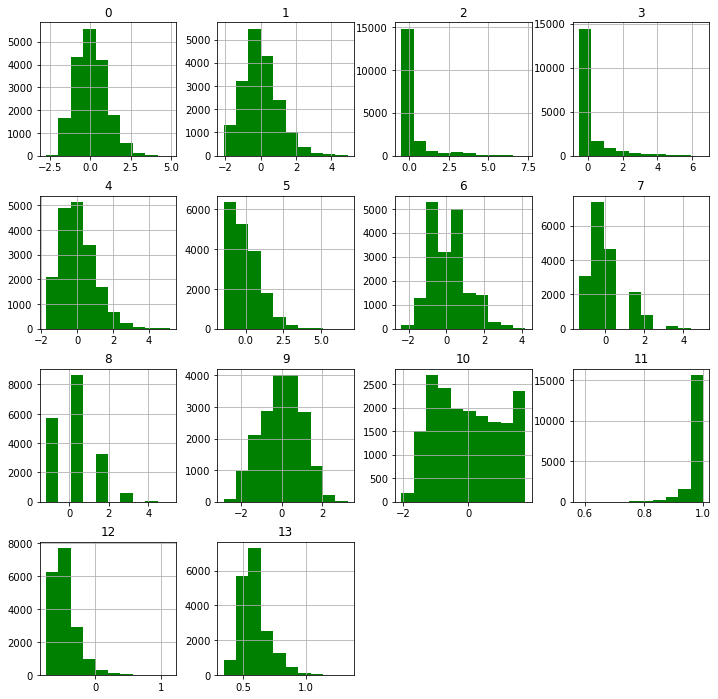

In [ ]:
# Check Distribution of Dataset After Scaling
df_full_dataset_scaled.hist(facecolor='g', figsize=(12,12))
plt.show()

In [ ]:

Length : <class 'numpy.int64'>
SubtlexZipf : <class 'numpy.float64'>
Ortho_N : <class 'numpy.int64'>
Phono_N : <class 'numpy.int64'>
OLD : <class 'numpy.float64'>
PLD : <class 'numpy.float64'>
NPhon : <class 'numpy.int64'>
NSyll : <class 'numpy.int64'>
NMorph : <class 'numpy.int64'>
AoA : <class 'numpy.float64'>
Prevalence : <class 'numpy.float64'>
Concreteness : <class 'numpy.float64'>
accuracy_l1 : <class 'numpy.float64'>
zrt_mean_l1 : <class 'numpy.float64'>
zrt_std_l1 : <class 'numpy.float64'>

In [ ]:
full_train, full_test, y_train, y_test = train_test_split(full_dataset_scaled, labels, test_size=0.30, random_state=42)

In [ ]:
print(len(full_train))
print(len(full_test))
print(len(y_train))
print(len(y_test))
print(y_test)

12765
5471
12765
5471
[10435  1163  8584 ...  7046  2460  5294]


# Baseline Predictions

In [ ]:
# Random Predictions Algorithm
def random_algorithm(train):
	predicted = []
	for row in train:
		index = randrange(len(train))
		predicted.append(train[index])
	return predicted

In [ ]:
seed(42)
predictions = random_algorithm(labels)

In [ ]:
mean_absolute_error(labels, predictions)

6103.511076990568

In [ ]:
# Zero Rule Algorithm
def zero_rule_algorithm_regression(train, test):
	prediction = np.mean(train)
	predicted = [prediction for i in range(len(test))]
	return predicted

In [ ]:
predictions = zero_rule_algorithm_regression(y_train, y_test)

In [ ]:
mean_absolute_error(predictions, y_test)

4520.270888392544

# Build Model

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

## Model 1: Word Frequency

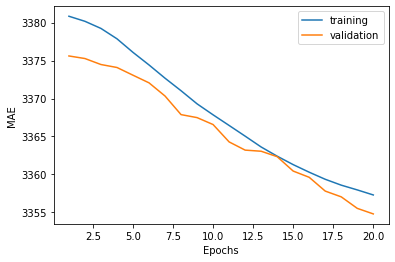

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
val_smooth_mae_history = smooth_curve(val_average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.plot(range(1, len(val_smooth_mae_history) + 1), val_smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
model_1 = build_model()
model_1.fit(train_data, y_train,
          epochs=num_epochs, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_1.evaluate(freq_test, y_test)

171/171 [==============================] - 0s 327us/step - loss: 16484764.0000 - mae: 3329.2046


In [1]:
# More Comprehensive Grid Search
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [2]:

def createmodel(n_layers, first_layer_nodes, last_layer_nodes, optim_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=train_data.shape[1], activation='relu'))
        else:
            model.add(Dense(n_nodes[i-1], activation='relu'))
            
    #Finally, the output layer should have a single node
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optim_func, loss='mse', metrics = ['MeanAbsoluteError']) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn
model =  KerasRegressor(build_fn=createmodel, verbose = False)

NameError: ignored

In [ ]:
#activation_funcs = ['sigmoid', 'relu', 'tanh'] 
#loss_funcs = ['binary_crossentropy','hinge']
optim_funcs = ['Adam', 'RMSprop']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [64,32,16], last_layer_nodes = [64, 8],  optim_func = optim_funcs, batch_size = [32, 100], epochs = [30,60])
grid_freq = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=4, verbose=3, return_train_score=True)

In [ ]:
sklearn.metrics.SCORERS.keys()

In [ ]:
train_data = freq_train

In [ ]:
grid_freq.fit(train_data, y_train)

In [ ]:
freq_results = grid_freq.cv_results_

In [ ]:
print(type(freq_results))
print(freq_results.keys())

In [ ]:
plt.plot(freq_results['mean_train_score'])
plt.plot(freq_results['mean_test_score'])
plt.rcParams['figure.figsize'] = [4, 7]
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print(grid_freq.best_score_)
print(grid_freq.best_params_)

In [ ]:
history = grid_freq.best_estimator_.model.history.history

In [ ]:
print(history)

In [ ]:
print(history.keys())

In [ ]:
grid_freq_best_history = pandas.DataFrame(history)

In [ ]:
grid_freq_best_history.to_csv('grid_freq_best_history.csv')

In [ ]:
plt.plot(history['mean_absolute_error'][3:])
#plt.plot(history['val_mean_absolute_error'])
plt.rcParams['figure.figsize'] = [4, 4]
plt.title('Model 1 Train MAE')
plt.ylabel('MAE')
plt.xlabel('epoch')
#plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
print("Best Estimator: \n{}\n".format(grid_freq.best_estimator_))
print("Best Parameters: \n{}\n".format(grid_freq.best_params_))
print("Best Test Score: \n{}\n".format(grid_freq.best_score_))
print("Best Training Score: \n{}\n".format(grid_freq.cv_results_['mean_train_score'][grid_freq.best_index_]))
print("All Training Scores: \n{}\n".format(grid_freq.cv_results_['mean_train_score']))
print("All Test Scores: \n{}\n".format(grid_freq.cv_results_['mean_test_score']))
# # This prints out all results during Cross-Validation in details
#print("All Meta Results During CV Search: \n{}\n".format(gs.cv_results_))

In [ ]:
grid_freq_results = pandas.DataFrame(freq_results)

In [ ]:
print(grid_freq_results)

In [ ]:
grid_freq_results.to_csv('grid_freq_results.csv')

In [ ]:
pred_word_freq = grid_freq.predict(freq_test)

In [ ]:
mean_absolute_error(pred_word_freq, y_test)

## Shuffled Dataset

In [ ]:
freq_train_shuffled = shuffle(freq_train, random_state=42)
y_train_shuffled = shuffle(y_train, random_state=42)

## Visualizing Train & Test Crossvalidation of Best Estimator

In [ ]:
# With No Hyperparameter Tuning
train_data = freq_train_shuffled
y_train = y_train_shuffled
num_epochs = 60
k = 4
all_mae_histories = []
val_all_mae_histories = []
num_val_samples = len(train_data) // k
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]])
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]])
    #print('partial train data', i)
    #print(partial_train_data, len(partial_train_data))
    #print('partial train targets', i)
    #print(partial_train_targets, len(partial_train_targets))

    model_trial = createmodel(3, 64, 8, 'Adam')
    # Train the model
    history = model_trial.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=32, verbose=0)
    mae_history = history.history['mean_absolute_error']
    all_mae_histories.append(mae_history)
    val_mae_history = history.history['val_mean_absolute_error']
    val_all_mae_histories.append(val_mae_history)
    

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
#print(average_mae_history)
val_average_mae_history = [
    np.mean([x[i] for x in val_all_mae_histories]) for i in range(num_epochs)]
#print(val_average_mae_history)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.plot(range(1, len(val_average_mae_history) + 1), val_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[5:])
val_smooth_mae_history = smooth_curve(val_average_mae_history[5:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.plot(range(1, len(val_smooth_mae_history) + 1), val_smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

## Model 2: Word Characteristics

In [ ]:
# With No Hyperparameter Tuning
train_data = word_char_train
num_epochs = 30
k = 4
all_mae_histories = []
val_all_mae_histories = []
num_val_samples = len(train_data) // k
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]])
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]])
    #print('partial train data', i)
    #print(partial_train_data, len(partial_train_data))
    #print('partial train targets', i)
    #print(partial_train_targets, len(partial_train_targets))

    model_2 = build_model()
    # Train the model
    history = model_2.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)
    val_mae_history = history.history['val_mae']
    val_all_mae_histories.append(val_mae_history)
    

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
val_average_mae_history = [
    np.mean([x[i] for x in val_all_mae_histories]) for i in range(num_epochs)]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.plot(range(1, len(val_average_mae_history) + 1), val_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
val_smooth_mae_history = smooth_curve(val_average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.plot(range(1, len(val_smooth_mae_history) + 1), val_smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
model_2 = build_model()
model_2.fit(train_data, y_train,
          epochs=num_epochs, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_2.evaluate(word_char_test, y_test)

In [ ]:
# With Hyperparameter Tuning
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [ ]:

def createmodel(n_layers, first_layer_nodes, last_layer_nodes, optim_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=train_data.shape[1], activation='relu'))
        else:
            model.add(Dense(n_nodes[i-1], activation='relu'))
            
    #Finally, the output layer should have a single node
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optim_func, loss='mse', metrics = ['MeanAbsoluteError']) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn
model =  KerasRegressor(build_fn=createmodel, verbose = False)

In [ ]:
#activation_funcs = ['sigmoid', 'relu', 'tanh'] 
#loss_funcs = ['binary_crossentropy','hinge']
optim_funcs = ['Adam', 'RMSprop']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [64,32,16], last_layer_nodes = [64, 8],  optim_func = optim_funcs, batch_size = [32, 100], epochs = [30,60])
grid_word_char = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=4, verbose=3, return_train_score=True)

In [ ]:
train_data = word_char_train

In [ ]:
grid_word_char.fit(train_data, y_train)

In [ ]:
print(grid_word_char.best_score_)
print(grid_word_char.best_params_)

In [ ]:
word_char_results = grid_word_char.cv_results_

In [ ]:
grid_word_char_results = pandas.DataFrame(word_char_results)

In [ ]:
grid_word_char_results.to_csv('grid_word_char_results.csv')

In [ ]:
print(word_char_results.keys())

In [ ]:
plt.plot(word_char_results['mean_train_score'])
plt.plot(word_char_results['mean_test_score'])
plt.rcParams['figure.figsize'] = [6, 6]
plt.legend(['train', 'val'], loc='lower left')
plt.show()

In [ ]:
history_word_char_best = grid_word_char.best_estimator_.model.history.history

In [ ]:
print(history_word_char_best)

In [ ]:
grid_word_char_best_history = pandas.DataFrame(history_word_char_best)

In [ ]:
grid_word_char_best_history.to_csv('grid_word_char_best_history.csv')

In [ ]:
print("Best Estimator: \n{}\n".format(grid_word_char.best_estimator_))
print("Best Parameters: \n{}\n".format(grid_word_char.best_params_))
print("Best Test Score: \n{}\n".format(grid_word_char.best_score_))
print("Best Training Score: \n{}\n".format(grid_word_char.cv_results_['mean_train_score'][grid_word_char.best_index_]))
print("All Training Scores: \n{}\n".format(grid_word_char.cv_results_['mean_train_score']))
print("All Test Scores: \n{}\n".format(grid_word_char.cv_results_['mean_test_score']))
# # This prints out all results during Cross-Validation in details
#print("All Meta Results During CV Search: \n{}\n".format(gs.cv_results_))

In [ ]:
pred_word_char = grid_word_char.predict(word_char_test)

In [ ]:
mean_absolute_error(pred_word_char, y_test)

## Shuffled Dataset

In [ ]:
word_char_train_shuffled = shuffle(word_char_train, random_state=42)

In [ ]:
# With No Hyperparameter Tuning
train_data = word_char_train_shuffled
y_train = y_train_shuffled
num_epochs = 60
k = 4
all_mae_histories = []
val_all_mae_histories = []
all_loss_histories = []
val_all_loss_histories = []
num_val_samples = len(train_data) // k
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]])
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]])
    #print('partial train data', i)
    #print(partial_train_data, len(partial_train_data))
    #print('partial train targets', i)
    #print(partial_train_targets, len(partial_train_targets))

    model_trial = createmodel(3, 64, 64, 'Adam')
    # Train the model
    history = model_trial.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=32, verbose=0)
    mae_history = history.history['mean_absolute_error']
    all_mae_histories.append(mae_history)
    val_mae_history = history.history['val_mean_absolute_error']
    val_all_mae_histories.append(val_mae_history)

    loss_history = history.history['loss']
    all_loss_histories.append(loss_history)
    val_loss_history = history.history['val_loss']
    val_all_loss_histories.append(val_loss_history)

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
val_average_mae_history = [
    np.mean([x[i] for x in val_all_mae_histories]) for i in range(num_epochs)]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.plot(range(1, len(val_average_mae_history) + 1), val_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[5:])
val_smooth_mae_history = smooth_curve(val_average_mae_history[5:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.plot(range(1, len(val_smooth_mae_history) + 1), val_smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

## Model 3: L1 Measures

In [ ]:
# With No Hyperparameter Tuning
train_data = l1_measures_train
num_epochs = 30
k = 4
all_mae_histories = []
val_all_mae_histories = []
num_val_samples = len(train_data) // k
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]])
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]])
    #print('partial train data', i)
    #print(partial_train_data, len(partial_train_data))
    #print('partial train targets', i)
    #print(partial_train_targets, len(partial_train_targets))

    model_3 = build_model()
    # Train the model
    history = model_3.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)
    val_mae_history = history.history['val_mae']
    val_all_mae_histories.append(val_mae_history)
    

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
val_average_mae_history = [
    np.mean([x[i] for x in val_all_mae_histories]) for i in range(num_epochs)]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.plot(range(1, len(val_average_mae_history) + 1), val_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
val_smooth_mae_history = smooth_curve(val_average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.plot(range(1, len(val_smooth_mae_history) + 1), val_smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
model_3 = build_model()
model_3.fit(train_data, y_train,
          epochs=num_epochs, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_3.evaluate(l1_measures_test, y_test)

In [ ]:
# With Hyperparameter Tuning
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [ ]:

def createmodel(n_layers, first_layer_nodes, last_layer_nodes, optim_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=train_data.shape[1], activation='relu'))
        else:
            model.add(Dense(n_nodes[i-1], activation='relu'))
            
    #Finally, the output layer should have a single node
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optim_func, loss='mse', metrics = ['MeanAbsoluteError']) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn
model =  KerasRegressor(build_fn=createmodel, verbose = False)

In [ ]:
#activation_funcs = ['sigmoid', 'relu', 'tanh'] 
#loss_funcs = ['binary_crossentropy','hinge']
optim_funcs = ['Adam', 'RMSprop']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [64,32,16], last_layer_nodes = [64, 8],  optim_func = optim_funcs, batch_size = [32, 100], epochs = [30,60])
grid_l1_measures = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=4, verbose=3)

In [ ]:
train_data = l1_measures_train

In [ ]:
grid_l1_measures.fit(train_data, y_train)

In [ ]:
print(grid_l1_measures.best_score_)
print(grid_l1_measures.best_params_)

In [ ]:
pred_l1_measures = grid_l1_measures.predict(l1_measures_test)

In [ ]:
mean_absolute_error(pred_l1_measures, y_test)

## Model 4: Word Characteristics & Word Frequency

In [ ]:
# With No Hyperparameter Tuning
train_data = wordcharfreq_train
num_epochs = 30
k = 4
all_mae_histories = []
val_all_mae_histories = []
num_val_samples = len(train_data) // k
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]])
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]])
    #print('partial train data', i)
    #print(partial_train_data, len(partial_train_data))
    #print('partial train targets', i)
    #print(partial_train_targets, len(partial_train_targets))

    model_4 = build_model()
    # Train the model
    history = model_4.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)
    val_mae_history = history.history['val_mae']
    val_all_mae_histories.append(val_mae_history)
    

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
val_average_mae_history = [
    np.mean([x[i] for x in val_all_mae_histories]) for i in range(num_epochs)]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.plot(range(1, len(val_average_mae_history) + 1), val_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
val_smooth_mae_history = smooth_curve(val_average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.plot(range(1, len(val_smooth_mae_history) + 1), val_smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
model_4 = build_model()
model_4.fit(train_data, y_train,
          epochs=num_epochs, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_4.evaluate(wordcharfreq_test, y_test)

In [ ]:
# With Hyperparameter Tuning
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [ ]:
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, optim_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=train_data.shape[1], activation='relu'))
        else:
            model.add(Dense(n_nodes[i-1], activation='relu'))
            
    #Finally, the output layer should have a single node
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optim_func, loss='mse', metrics = ['MeanAbsoluteError']) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn
model =  KerasRegressor(build_fn=createmodel, verbose = False)

In [ ]:
#activation_funcs = ['sigmoid', 'relu', 'tanh'] 
#loss_funcs = ['binary_crossentropy','hinge']
optim_funcs = ['Adam', 'RMSprop']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [64,32,16], last_layer_nodes = [64, 8],  optim_func = optim_funcs, batch_size = [32, 100], epochs = [30,60])
grid_wordcharfreq = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=4, verbose=3)

In [ ]:
train_data = wordcharfreq_train

In [ ]:
grid_wordcharfreq.fit(train_data, y_train)

In [ ]:
print(grid_wordcharfreq.best_score_)
print(grid_wordcharfreq.best_params_)

In [ ]:
pred_wordcharfreq = grid_wordcharfreq.predict(wordcharfreq_test)

In [ ]:
mean_absolute_error(pred_wordcharfreq, y_test)

## Model 5: Word Characteristics (No Word Frequency) & L1 Measures

In [ ]:
# With No Hyperparameter Tuning
train_data = wordcharl1_train
num_epochs = 30
k = 4
all_mae_histories = []
val_all_mae_histories = []
num_val_samples = len(train_data) // k
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]])
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]])
    #print('partial train data', i)
    #print(partial_train_data, len(partial_train_data))
    #print('partial train targets', i)
    #print(partial_train_targets, len(partial_train_targets))

    model_5 = build_model()
    # Train the model
    history = model_5.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)
    val_mae_history = history.history['val_mae']
    val_all_mae_histories.append(val_mae_history)
    

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
val_average_mae_history = [
    np.mean([x[i] for x in val_all_mae_histories]) for i in range(num_epochs)]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.plot(range(1, len(val_average_mae_history) + 1), val_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
val_smooth_mae_history = smooth_curve(val_average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.plot(range(1, len(val_smooth_mae_history) + 1), val_smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
model_5 = build_model()
model_5.fit(train_data, y_train,
          epochs=num_epochs, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_5.evaluate(wordcharl1_test, y_test)

In [ ]:
# With Hyperparameter Tuning
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [ ]:
def createmodel(n_layers, first_layer_nodes, last_layer_nodes, optim_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=train_data.shape[1], activation='relu'))
        else:
            model.add(Dense(n_nodes[i-1], activation='relu'))
            
    #Finally, the output layer should have a single node
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optim_func, loss='mse', metrics = ['MeanAbsoluteError']) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn
model =  KerasRegressor(build_fn=createmodel, verbose = False)

In [ ]:
#activation_funcs = ['sigmoid', 'relu', 'tanh'] 
#loss_funcs = ['binary_crossentropy','hinge']
optim_funcs = ['Adam', 'RMSprop']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [64,32,16], last_layer_nodes = [64, 8],  optim_func = optim_funcs, batch_size = [32, 100], epochs = [30,60])
grid_wordcharl1 = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=4, verbose=3)

In [ ]:
train_data = wordcharl1_train

In [ ]:
grid_wordcharl1.fit(train_data, y_train)

In [ ]:
print(grid_wordcharl1.best_score_)
print(grid_wordcharl1.best_params_)

In [ ]:
pred_wordcharl1 = grid_wordcharl1.predict(wordcharl1_test)

In [ ]:
mean_absolute_error(pred_wordcharl1, y_test)

## Model 6: All Features

In [ ]:
# With No Hyperparameter Tuning
train_data = full_train
num_epochs = 30
k = 4
all_mae_histories = []
val_all_mae_histories = []
num_val_samples = len(freq_train) // k
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
        train_data[(i + 1) * num_val_samples:]])
    partial_train_targets = np.concatenate(
        [y_train[:i * num_val_samples],
        y_train[(i + 1) * num_val_samples:]])
    #print('partial train data', i)
    #print(partial_train_data, len(partial_train_data))
    #print('partial train targets', i)
    #print(partial_train_targets, len(partial_train_targets))

    model_5 = build_model()
    # Train the model
    history = model_5.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['mae']
    all_mae_histories.append(mae_history)
    val_mae_history = history.history['val_mae']
    val_all_mae_histories.append(val_mae_history)
    

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
val_average_mae_history = [
    np.mean([x[i] for x in val_all_mae_histories]) for i in range(num_epochs)]

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.plot(range(1, len(val_average_mae_history) + 1), val_average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])
val_smooth_mae_history = smooth_curve(val_average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.plot(range(1, len(val_smooth_mae_history) + 1), val_smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend(['training', 'validation'])
plt.show()

In [ ]:
model_5 = build_model()
model_5.fit(train_data, y_train,
          epochs=num_epochs, batch_size=1, verbose=0)
test_mse_score, test_mae_score = model_5.evaluate(full_test, y_test)

In [ ]:
# With Hyperparameter Tuning
def FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes):
    layers = []
    
    nodes_increment = (last_layer_nodes - first_layer_nodes)/ (n_layers-1)
    nodes = first_layer_nodes
    for i in range(1, n_layers+1):
        layers.append(math.ceil(nodes))
        nodes = nodes + nodes_increment
    
    return layers

In [ ]:

def createmodel(n_layers, first_layer_nodes, last_layer_nodes, optim_func):
    model = Sequential()
    n_nodes = FindLayerNodesLinear(n_layers, first_layer_nodes, last_layer_nodes)
    for i in range(1, n_layers):
        if i==1:
            model.add(Dense(first_layer_nodes, input_dim=train_data.shape[1], activation='relu'))
        else:
            model.add(Dense(n_nodes[i-1], activation='relu'))
            
    #Finally, the output layer should have a single node
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer=optim_func, loss='mse', metrics = ['MeanAbsoluteError']) #note: metrics could also be 'mse'
    
    return model

##Wrap model into scikit-learn
model =  KerasRegressor(build_fn=createmodel, verbose = False)

In [ ]:
#activation_funcs = ['sigmoid', 'relu', 'tanh'] 
#loss_funcs = ['binary_crossentropy','hinge']
optim_funcs = ['Adam', 'RMSprop']
param_grid = dict(n_layers=[2,3], first_layer_nodes = [64,32,16], last_layer_nodes = [64, 8],  optim_func = optim_funcs, batch_size = [32, 100], epochs = [30,60])
grid_full = GridSearchCV(estimator = model, param_grid = param_grid, scoring='neg_mean_absolute_error', n_jobs=-1, cv=4, verbose=3)

In [ ]:
train_data = full_train

In [ ]:
grid_full.fit(train_data, y_train)

In [ ]:
print(grid_full.best_score_)
print(grid_full.best_params_)

In [ ]:
pred_full = grid_full.predict(full_test)

In [ ]:
mean_absolute_error(pred_full, y_test)